# Data Exploration 

### Process
I will begin by importing the files and inspecting the data, examining its structure, format, and columns. Next, I'll adjust data types as needed, such as converting strings to dates or integers to strings, to ensure consistency and usability. Additionally, I will create initial plots to explore general trends in the data and gain insights into its overall patterns.

In [1]:
#Dependencies
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
from pprint import pprint
from scipy import stats

In [2]:
#Importing dataset from CSV file
csvfile = Path('Data_CSV/dailyActivity_merged.csv')
daily_activity_df = pd.read_csv(csvfile)
daily_activity_df.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863


In [3]:
# Get a list of unique IDs in the 'Id' column
id_list = daily_activity_df['Id'].unique()

# Print the data types of each column in the DataFrame
print("Column data types")
print("------------")
pprint(daily_activity_df.dtypes)

# Print the number of unique IDs and display the list of unique IDs
print("------------")
print(f"There are {daily_activity_df['Id'].nunique()} unique Ids in the dataset")
print(id_list)

Column data types
------------
Id                            int64
ActivityDate                 object
TotalSteps                    int64
TotalDistance               float64
TrackerDistance             float64
LoggedActivitiesDistance    float64
VeryActiveDistance          float64
ModeratelyActiveDistance    float64
LightActiveDistance         float64
SedentaryActiveDistance     float64
VeryActiveMinutes             int64
FairlyActiveMinutes           int64
LightlyActiveMinutes          int64
SedentaryMinutes              int64
Calories                      int64
dtype: object
------------
There are 33 unique Ids in the dataset
[1503960366 1624580081 1644430081 1844505072 1927972279 2022484408
 2026352035 2320127002 2347167796 2873212765 3372868164 3977333714
 4020332650 4057192912 4319703577 4388161847 4445114986 4558609924
 4702921684 5553957443 5577150313 6117666160 6290855005 6775888955
 6962181067 7007744171 7086361926 8053475328 8253242879 8378563200
 8583815059 8792009665 88776

### Converting dtypes


In [4]:
#Convert id from integer to string so that it is considered a discrete variable instead of a continuous one.
clean_daily_activity_df = daily_activity_df[:]
clean_daily_activity_df['Id'] = clean_daily_activity_df['Id'].astype("str")

print("Column data types")
print("------------")
pprint(clean_daily_activity_df.dtypes)

print("------------")
print(f"There are {clean_daily_activity_df['Id'].nunique()} unique Ids in the dataset")
print(clean_daily_activity_df['Id'].unique())

Column data types
------------
Id                           object
ActivityDate                 object
TotalSteps                    int64
TotalDistance               float64
TrackerDistance             float64
LoggedActivitiesDistance    float64
VeryActiveDistance          float64
ModeratelyActiveDistance    float64
LightActiveDistance         float64
SedentaryActiveDistance     float64
VeryActiveMinutes             int64
FairlyActiveMinutes           int64
LightlyActiveMinutes          int64
SedentaryMinutes              int64
Calories                      int64
dtype: object
------------
There are 33 unique Ids in the dataset
['1503960366' '1624580081' '1644430081' '1844505072' '1927972279'
 '2022484408' '2026352035' '2320127002' '2347167796' '2873212765'
 '3372868164' '3977333714' '4020332650' '4057192912' '4319703577'
 '4388161847' '4445114986' '4558609924' '4702921684' '5553957443'
 '5577150313' '6117666160' '6290855005' '6775888955' '6962181067'
 '7007744171' '7086361926' '80534

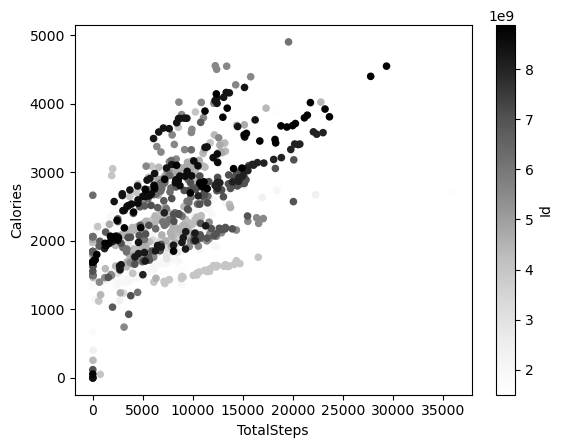

In [5]:
# Create a scatter plot with 'TotalSteps' on the x-axis and 'Calories' on the y-axis,
# using different colors for each unique 'Id'
daily_activity_df.plot.scatter(x='TotalSteps', y='Calories', c='Id')
plt.show()  # Display the plot

### Overall Statistics

In [6]:
total_days = clean_daily_activity_df['ActivityDate'].nunique()
print(f"The dataset covers {total_days} different days.")

The dataset covers 31 different days.


In [7]:
# Group the data by user id and count the number of activity days per user
tracked_days = daily_activity_df.groupby('Id').count()['ActivityDate']

# Sort the value in descending order in order to look for the most active users
tracked_days = tracked_days.sort_values(ascending=False)

# Display how many users track their activity on different day counts
print('# Days | # Users')
print(tracked_days.value_counts())

# Days | # Users
ActivityDate
31    21
30     3
29     2
26     2
28     1
20     1
19     1
18     1
4      1
Name: count, dtype: int64


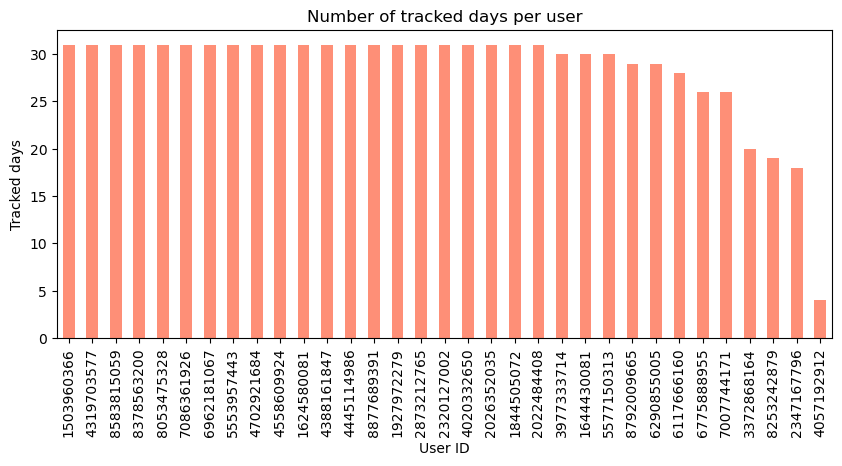

In [8]:
# Create a bar plot showing the number of tracked days for each user
tracked_days.plot.bar(figsize=(10, 4), color='#FE8F77')
plt.title('Number of tracked days per user')
plt.xlabel('User ID')
plt.ylabel('Tracked days')
plt.show()  # Display the plot

,Id,TotalSteps,Calories,Calories per step
1,1624580081,5743.903226,1483.354839,0.258249
11,3977333714,10984.566667,1513.666667,0.137799
6,2026352035,5566.870968,1540.645161,0.276752
3,1844505072,2580.064516,1573.483871,0.609862
7,2320127002,4716.870968,1724.161290,0.365531


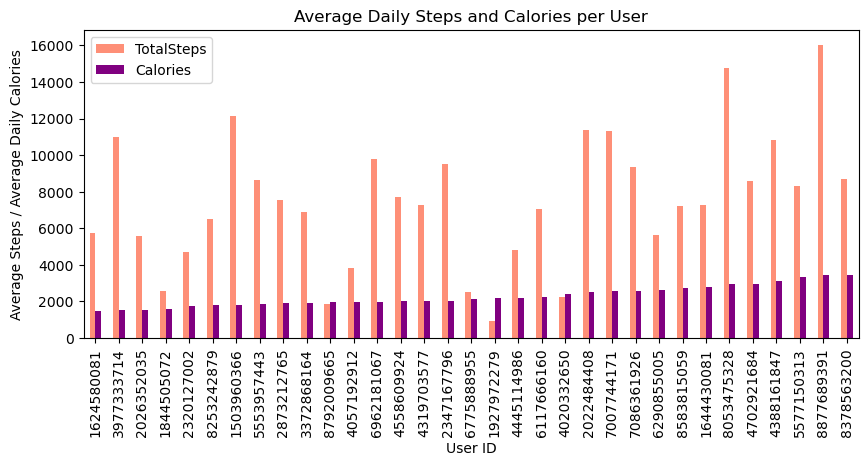

In [9]:
# Group data by 'Id' and calculate the average 'TotalSteps' and 'Calories' per user
average_steps = daily_activity_df.groupby('Id', as_index=False)[['TotalSteps', 'Calories']].mean()

# Sort users in ascending order based on 'Calories' to identify less active users first
average_steps = average_steps.sort_values(by='Calories', ascending=True)

# Calculate the calories burned per step for each user
average_steps['Calories per step'] = average_steps['Calories'] / average_steps['TotalSteps']

# Display the first few rows of the resulting DataFrame
display(average_steps.head())

# Plot average steps and calories per user as a bar chart
average_steps.plot.bar(x='Id', y=['TotalSteps', 'Calories'], figsize=(10, 4), color=["#FE8F77", 'purple'])
plt.title('Average Daily Steps and Calories per User')
plt.xlabel('User ID')
plt.ylabel('Average Steps / Average Daily Calories')
plt.show()

##### Preliminary Conclusions 
High Variability in Steps Across Users: There is significant variation in the average daily steps between users. Some users have consistently high step counts, while others have much lower averages, indicating different levels of physical activity.

Calories Do Not Scale Proportionally with Steps: Although some users have high step counts, their average daily calorie expenditure does not increase proportionally. This suggests that calorie burn may be influenced by other factors, such as individual metabolism or the intensity of activities beyond steps alone.

Calorie Consistency Across Users: Most users have a similar range of average daily calories, with fewer extreme variations compared to steps. This implies a relatively consistent baseline of calorie expenditure among users, regardless of differences in physical activity levels.

,Id,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,TotalMinutes,TotalHours,VeryActiveMinutesPercent,FairlyActiveMinutesPercent,LightlyActiveMinutesPercent,SedentaryMinutesPercent
28,8253242879,20.526316,14.315789,116.894737,1287.368421,1439.105263,23.985088,0.014263,0.009948,0.081227,0.894562
30,8583815059,9.677419,22.193548,138.290323,1267.225806,1437.387097,23.956452,0.006733,0.015440,0.096210,0.881618
22,6290855005,2.758621,3.793103,227.448276,1193.034483,1427.034483,23.783908,0.001933,0.002658,0.159385,0.836024
1,1624580081,8.677419,5.806452,153.483871,1257.741935,1425.709677,23.761828,0.006086,0.004073,0.107654,0.882187
5,2022484408,36.290323,19.354839,257.451613,1112.580645,1425.677419,23.761290,0.025455,0.013576,0.180582,0.780387
9,2873212765,14.096774,6.129032,308.000000,1097.193548,1425.419355,23.756989,0.009890,0.004300,0.216077,0.769734
32,8877689391,66.064516,9.935484,234.709677,1112.870968,1423.580645,23.726344,0.046407,0.006979,0.164873,0.781741
7,2320127002,1.354839,2.580645,198.193548,1220.096774,1422.225806,23.703763,0.000953,0.001815,0.139354,0.857878
10,3372868164,9.150000,4.100000,327.900000,1077.550000,1418.700000,23.645000,0.006450,0.002890,0.231127,0.759533
17,4558609924,10.387097,13.709677,284.967742,1093.612903,1402.677419,23.377957,0.007405,0.009774,0.203160,0.779661


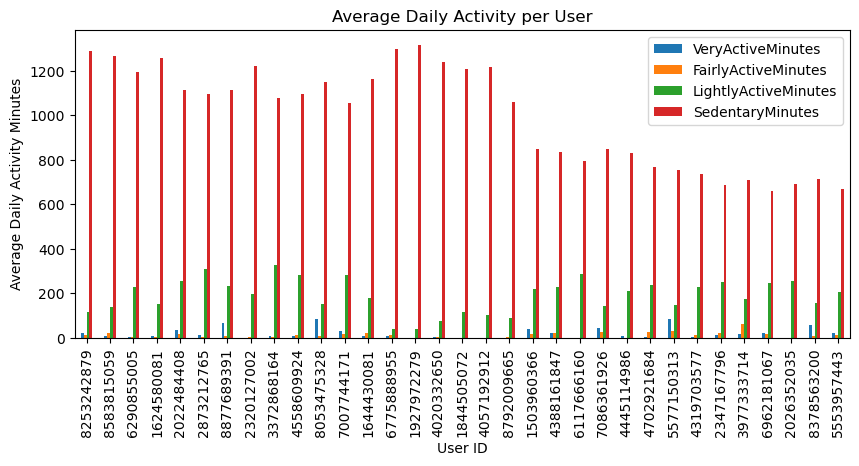

In [10]:
# Group data by 'Id' and calculate the average activity minutes per user for each category
average_activity = daily_activity_df.groupby('Id', as_index=False)[['VeryActiveMinutes', 'FairlyActiveMinutes', 'LightlyActiveMinutes', 'SedentaryMinutes']].mean()

# Calculate total activity minutes and convert it to hours for each user
average_activity['TotalMinutes'] = average_activity[['VeryActiveMinutes', 'FairlyActiveMinutes', 'LightlyActiveMinutes', 'SedentaryMinutes']].sum(axis=1)
average_activity['TotalHours'] = average_activity['TotalMinutes'] / 60

# Calculate the percentage of each activity type
for activity in ['VeryActiveMinutes', 'FairlyActiveMinutes', 'LightlyActiveMinutes', 'SedentaryMinutes']:
    average_activity[f'{activity}Percent'] = average_activity[activity] / average_activity['TotalMinutes']

# Sort users by total activity minutes in descending order
average_activity = average_activity.sort_values(by='TotalMinutes', ascending=False)

# Display the top 33 users with the highest total activity
display(average_activity.head(33))

# Plot average daily activity minutes for each user by activity type
average_activity.plot.bar(x='Id', y=['VeryActiveMinutes', 'FairlyActiveMinutes', 'LightlyActiveMinutes', 'SedentaryMinutes'], figsize=(10, 4))
plt.title('Average Daily Activity per User')
plt.xlabel('User ID')
plt.ylabel('Average Daily Activity Minutes')
plt.show()

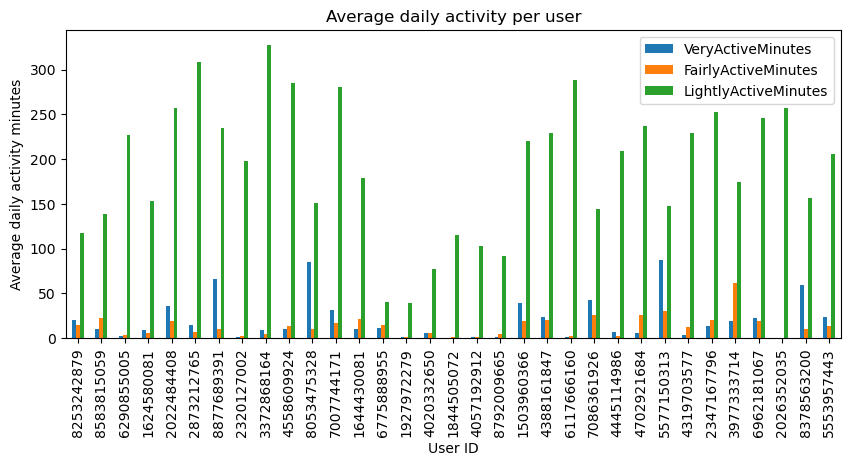

In [13]:
#Plot the data removing sedentary minutes from chart for better visualization of active minute types
average_activity.plot.bar(figsize=(10,4),x='Id', y=['VeryActiveMinutes', 'FairlyActiveMinutes', 'LightlyActiveMinutes'])
plt.title('Average daily activity per user')
plt.xlabel('User ID')
plt.ylabel('Average daily activity minutes')
plt.show()

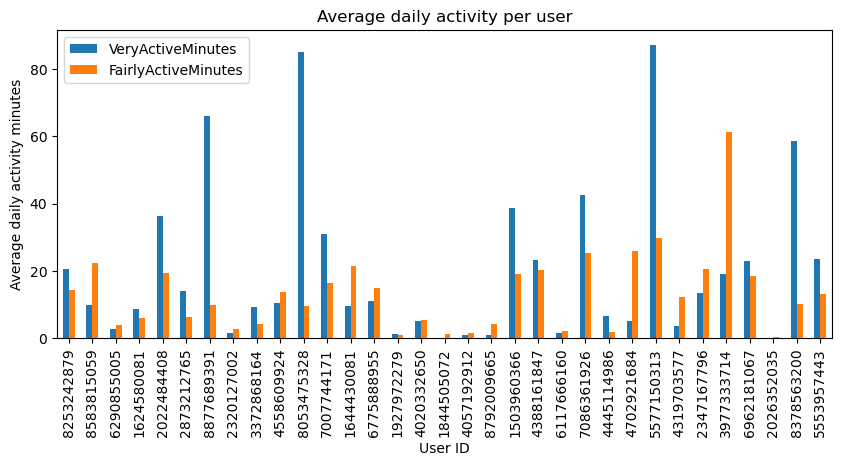

In [14]:
#Replot removing sedentary and lightly active minutes for better visualization of exercise activity minutes.
average_activity.plot.bar(figsize=(10,4),x='Id', y=['VeryActiveMinutes', 'FairlyActiveMinutes'])
plt.title('Average daily activity per user')
plt.xlabel('User ID')
plt.ylabel('Average daily activity minutes')
plt.show()

,Id,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance
32,8877689391,13.212903,13.212903,0.000000,6.637419,0.337742,6.188710,0.005161
27,8053475328,11.475161,11.475161,0.000000,8.514839,0.423871,2.533871,0.000000
15,4388161847,8.393226,8.393226,0.000000,1.719355,0.901935,5.396129,0.000000
5,2022484408,8.084193,8.084193,0.000000,2.421613,0.720000,4.942581,0.000000
25,7007744171,8.015385,7.575769,2.118673,2.415000,0.738462,4.861538,0.000769


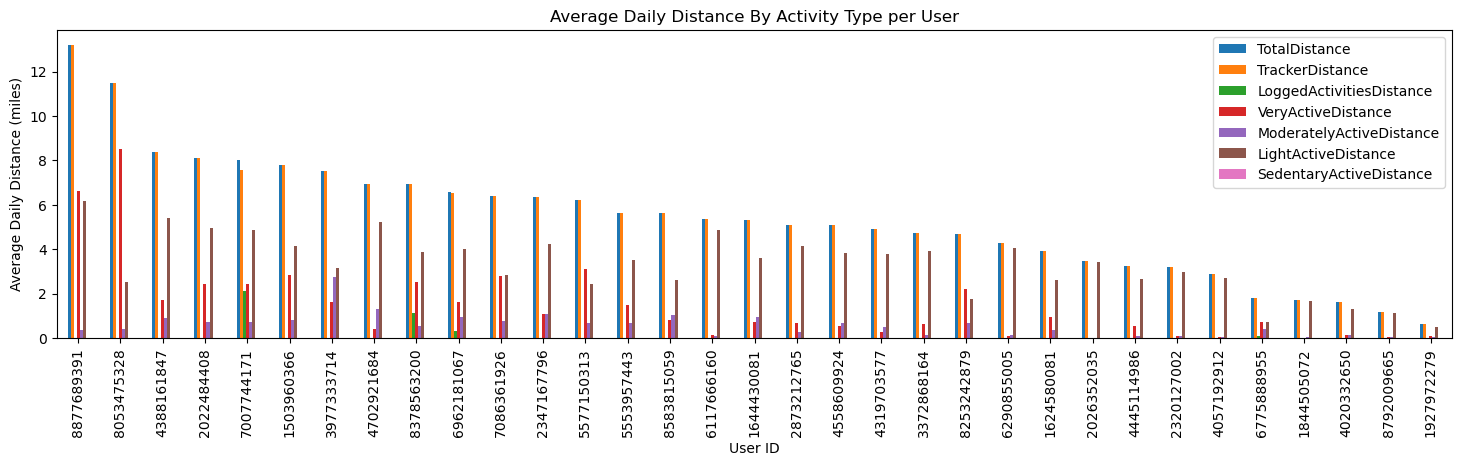

In [17]:
# Group data by 'Id' and calculate the average distance metrics per user
average_distance = daily_activity_df.groupby('Id', as_index=False)[['TotalDistance', 'TrackerDistance', 'LoggedActivitiesDistance', 'VeryActiveDistance', 'ModeratelyActiveDistance', 'LightActiveDistance', 'SedentaryActiveDistance']].mean()

# Sort users by 'TotalDistance' in descending order to find the most active users
average_distance = average_distance.sort_values(by='TotalDistance', ascending=False)

# Display the top rows of the DataFrame
display(average_distance.head())

# Plot average daily distance metrics for each user as a bar chart
average_distance.plot.bar(x='Id', figsize=(18, 4))
plt.title('Average Daily Distance By Activity Type per User')
plt.xlabel('User ID')
plt.ylabel('Average Daily Distance (miles)')
plt.show()

### Merge the Datasets to Create a Comprehensive DataFrame

In [18]:
# Merge 'tracked_days' with 'average_steps' on 'Id', including all records from both DataFrames
daily_average_df = pd.merge(tracked_days, average_steps, how='outer', on='Id')

# Merge the result with 'average_activity' on 'Id', keeping all records
daily_average_df = daily_average_df.merge(average_activity, how='outer', on='Id')

# Merge the result with 'average_distance' on 'Id', including all records
daily_average_df = daily_average_df.merge(average_distance, how='outer', on='Id')

# Display basic information about the merged DataFrame, including column types and non-null counts
daily_average_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Id                           33 non-null     int64  
 1   ActivityDate                 33 non-null     int64  
 2   TotalSteps                   33 non-null     float64
 3   Calories                     33 non-null     float64
 4   Calories per step            33 non-null     float64
 5   VeryActiveMinutes            33 non-null     float64
 6   FairlyActiveMinutes          33 non-null     float64
 7   LightlyActiveMinutes         33 non-null     float64
 8   SedentaryMinutes             33 non-null     float64
 9   TotalMinutes                 33 non-null     float64
 10  TotalHours                   33 non-null     float64
 11  VeryActiveMinutesPercent     33 non-null     float64
 12  FairlyActiveMinutesPercent   33 non-null     float64
 13  LightlyActiveMinutesPe

R-value: 0.44 (weak correlation)
Model: Y = 0.07 * X + 1766.51


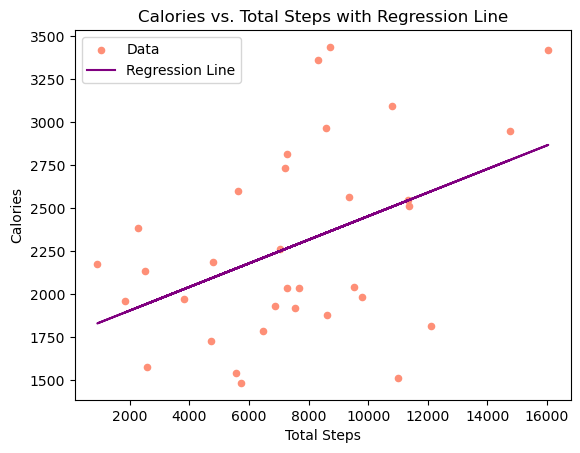

In [19]:
# Function to interpret Pearson correlation coefficient
def pearson(r):
    """Prints the strength of correlation based on Pearson's r-value."""
    if abs(r) < 0.3:
        print(f"R-value: {r:.2f} (no correlation)")
    elif abs(r) < 0.5:
        print(f"R-value: {r:.2f} (weak correlation)")
    elif abs(r) < 0.7:
        print(f"R-value: {r:.2f} (moderate correlation)")
    else:
        print(f"R-value: {r:.2f} (strong correlation)")

# Define variables for the linear regression model
x_data = daily_average_df['TotalSteps']  # Independent variable: total steps
y_data = daily_average_df['Calories']    # Dependent variable: calories

# Perform linear regression and retrieve model parameters
slope, intercept, rvalue, pvalue, stdeve = stats.linregress(x_data, y_data)

# Calculate regression line values based on slope and intercept
regress_values = slope * x_data + intercept

# Interpret the Pearson correlation coefficient
pearson(rvalue)

# Display the linear regression model equation
print(f"Model: Y = {slope:.2f} * X + {intercept:.2f}")

# Plot the scatter plot of TotalSteps vs. Calories and overlay the regression line
daily_average_df.plot.scatter(x='TotalSteps', y='Calories', color='#FE8F77', label='Data')
plt.plot(x_data, regress_values, color='purple', label='Regression Line')
plt.title('Calories vs. Total Steps with Regression Line')
plt.xlabel('Total Steps')
plt.ylabel('Calories')
plt.legend()
plt.show()

R-value: 0.55 (moderate correlation)
Model: Y = 110.90 * X + 1683.70


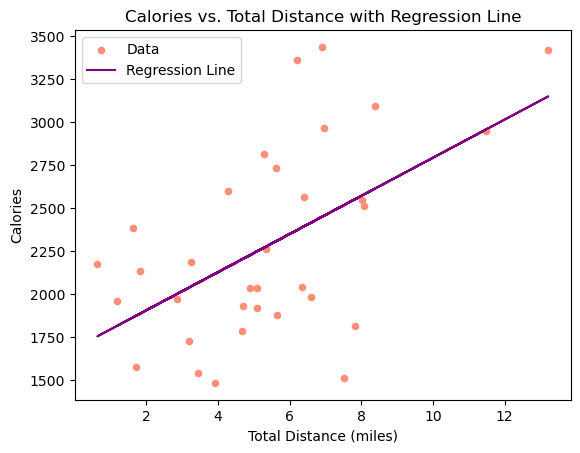

In [20]:
# Define variables for the linear regression model
x_data = daily_average_df['TotalDistance']  # Independent variable: total distance
y_data = daily_average_df['Calories']       # Dependent variable: calories

# Perform linear regression and retrieve model parameters
slope, intercept, rvalue, pvalue, stdeve = stats.linregress(x_data, y_data)

# Calculate regression line values based on slope and intercept
regress_values = slope * x_data + intercept

# Interpret the Pearson correlation coefficient
pearson(rvalue)

# Display the linear regression model equation
print(f"Model: Y = {slope:.2f} * X + {intercept:.2f}")

# Plot the scatter plot of TotalDistance vs. Calories and overlay the regression line
daily_average_df.plot.scatter(x='TotalDistance', y='Calories', color='#FE8F77', label='Data')
plt.plot(x_data, regress_values, color='purple', label='Regression Line')
plt.title('Calories vs. Total Distance with Regression Line')
plt.xlabel('Total Distance (miles)')
plt.ylabel('Calories')
plt.legend()
plt.show()